# https://github.com/ShuaiBai623/AI-City-Anomaly-Detection/blob/master/src/bg_modeling/capture_and_average.py

In [1]:
import cv2 as cv
import os
import sys
import glob
import PIL
import skimage
import numpy as np

In [6]:
def load_video(filename):
    # Loads a video with opencv, returns PIL Images for each frame
    
    vid = cv.VideoCapture(filename)

    while vid.isOpened():
        has_frame, img = vid.read()

        if has_frame:
            yield img
        else:
            break
            
    vid.release()

def get_num_frames(filename):
    vid = cv.VideoCapture(filename)
    nframes = int(vid.get(cv.CAP_PROP_FRAME_COUNT))
    vid.release()
    
    return nframes

In [3]:
def calc_background(images, interval=20, alpha=0.1, start_frame=1, threshold=5):    
    running_bg = None
    prev_img = None
    for i, img in enumerate(images):
        if running_bg is None: # initial image
            running_bg = img
            prev_img = img
            continue
        
        if (i - start_frame) % interval != 0: # every (i * internal_frame + start_frame) frames, do the calcs
            continue
        
        diff = np.mean(np.abs(prev_img - img))
        if diff > threshold: # if new image is significantly different from old
            running_bg = (1 - alpha) * running_bg + alpha * img # new background
            yield running_bg, i
        
        else:
            yield running_bg*0, i  # black image
            
        prev_img = img

---

In [4]:
video_dir = "/data/aicity/test"
dest_dir = "/data/aicity/winner_team/processed_images/test"

In [5]:
for video_filename in sorted(os.listdir(video_dir)):
    # loading
    video_path = os.path.join(video_dir, video_filename) # eg "video_dir/2.mp4"
    images = load_video(video_path)
    
    # processing
    bg_images = calc_background(images, interval=20, alpha=0.05, start_frame=1, threshold=5)
        
    
    # writing
    output_folder = os.path.join(dest_dir, os.path.splitext(video_filename)[0]) # eg "dest_dir/2"
    os.makedirs(output_folder, exist_ok=True)

    num_frames = get_num_frames(video_path)
    
    for img, idx in bg_images:
        cv.imwrite(os.path.join(output_folder, f"{idx}.jpg"), img)
        print(f"{idx}/{num_frames}")

1/26760.0
21/26760.0
41/26760.0
61/26760.0
81/26760.0
101/26760.0
121/26760.0
141/26760.0
161/26760.0
181/26760.0
201/26760.0
221/26760.0
241/26760.0
261/26760.0
281/26760.0
301/26760.0
321/26760.0
341/26760.0
361/26760.0
381/26760.0
401/26760.0
421/26760.0
441/26760.0
461/26760.0
481/26760.0
501/26760.0
521/26760.0
541/26760.0
561/26760.0
581/26760.0
601/26760.0
621/26760.0
641/26760.0
661/26760.0
681/26760.0
701/26760.0
721/26760.0
741/26760.0
761/26760.0
781/26760.0
801/26760.0
821/26760.0
841/26760.0
861/26760.0
881/26760.0
901/26760.0
921/26760.0
941/26760.0
961/26760.0
981/26760.0
1001/26760.0
1021/26760.0
1041/26760.0
1061/26760.0
1081/26760.0
1101/26760.0
1121/26760.0
1141/26760.0
1161/26760.0
1181/26760.0
1201/26760.0
1221/26760.0
1241/26760.0
1261/26760.0
1281/26760.0
1301/26760.0
1321/26760.0
1341/26760.0
1361/26760.0
1381/26760.0
1401/26760.0
1421/26760.0
1441/26760.0
1461/26760.0
1481/26760.0
1501/26760.0
1521/26760.0
1541/26760.0
1561/26760.0
1581/26760.0
1601/26760.0
162

12661/26760.0
12681/26760.0
12701/26760.0
12721/26760.0
12741/26760.0
12761/26760.0
12781/26760.0
12801/26760.0
12821/26760.0
12841/26760.0
12861/26760.0
12881/26760.0
12901/26760.0
12921/26760.0
12941/26760.0
12961/26760.0
12981/26760.0
13001/26760.0
13021/26760.0
13041/26760.0
13061/26760.0
13081/26760.0
13101/26760.0
13121/26760.0
13141/26760.0
13161/26760.0
13181/26760.0
13201/26760.0
13221/26760.0
13241/26760.0
13261/26760.0
13281/26760.0
13301/26760.0
13321/26760.0
13341/26760.0
13361/26760.0
13381/26760.0
13401/26760.0
13421/26760.0
13441/26760.0
13461/26760.0
13481/26760.0
13501/26760.0
13521/26760.0
13541/26760.0
13561/26760.0
13581/26760.0
13601/26760.0
13621/26760.0
13641/26760.0
13661/26760.0
13681/26760.0
13701/26760.0
13721/26760.0
13741/26760.0
13761/26760.0
13781/26760.0
13801/26760.0
13821/26760.0
13841/26760.0
13861/26760.0
13881/26760.0
13901/26760.0
13921/26760.0
13941/26760.0
13961/26760.0
13981/26760.0
14001/26760.0
14021/26760.0
14041/26760.0
14061/26760.0
14081/

24481/26760.0
24501/26760.0
24521/26760.0
24541/26760.0
24561/26760.0
24581/26760.0
24601/26760.0
24621/26760.0
24641/26760.0
24661/26760.0
24681/26760.0
24701/26760.0
24721/26760.0
24741/26760.0
24761/26760.0
24781/26760.0
24801/26760.0
24821/26760.0
24841/26760.0
24861/26760.0
24881/26760.0
24901/26760.0
24921/26760.0
24941/26760.0
24961/26760.0
24981/26760.0
25001/26760.0
25021/26760.0
25041/26760.0
25061/26760.0
25081/26760.0
25101/26760.0
25121/26760.0
25141/26760.0
25161/26760.0
25181/26760.0
25201/26760.0
25221/26760.0
25241/26760.0
25261/26760.0
25281/26760.0
25301/26760.0
25321/26760.0
25341/26760.0
25361/26760.0
25381/26760.0
25401/26760.0
25421/26760.0
25441/26760.0
25461/26760.0
25481/26760.0
25501/26760.0
25521/26760.0
25541/26760.0
25561/26760.0
25581/26760.0
25601/26760.0
25621/26760.0
25641/26760.0
25661/26760.0
25681/26760.0
25701/26760.0
25721/26760.0
25741/26760.0
25761/26760.0
25781/26760.0
25801/26760.0
25821/26760.0
25841/26760.0
25861/26760.0
25881/26760.0
25901/

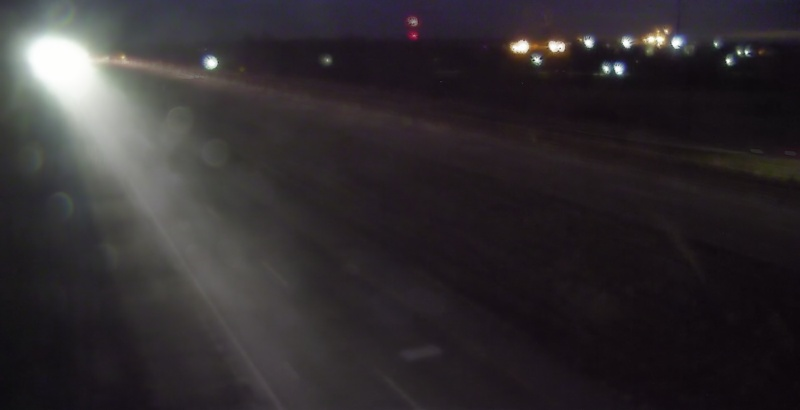

In [10]:
PIL.Image.fromarray(cv.imread(os.path.join(dest_dir, "2", "1001.jpg"))[:, :, ::-1])